# Multiclass Classification with a neural network

In [3]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [4]:
from pyldl.activations import Sigmoid, Softmax
from pyldl.layers import Sequential
from pyldl.losses import CrossEntropyLoss
from pyldl.modules import Linear
from pyldl.optimizers import SGD
from pyldl.utils import encode_one_hot

## Dataset and Network

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target
y_one_hot = encode_one_hot(y)

In [6]:
network = Sequential(Linear(X.shape[1], 128), Sigmoid(), Linear(128, 64), Sigmoid(), Linear(64, 10))
loss = CrossEntropyLoss()

## Model performances

In [7]:
SGD(network, loss, X, y_one_hot, batch_size=64, gradient_step=1e-3, n_iter=1000)

100%|██████████| 1000/1000 [00:45<00:00, 22.09it/s]


In [8]:
def predict(X):
    return network(X).argmax(axis=1)

def accuracy(y, yhat):
    return (y == yhat).mean()

yhat = predict(X)
print(f"Accuracy: {accuracy(y, yhat)}")

Accuracy: 1.0


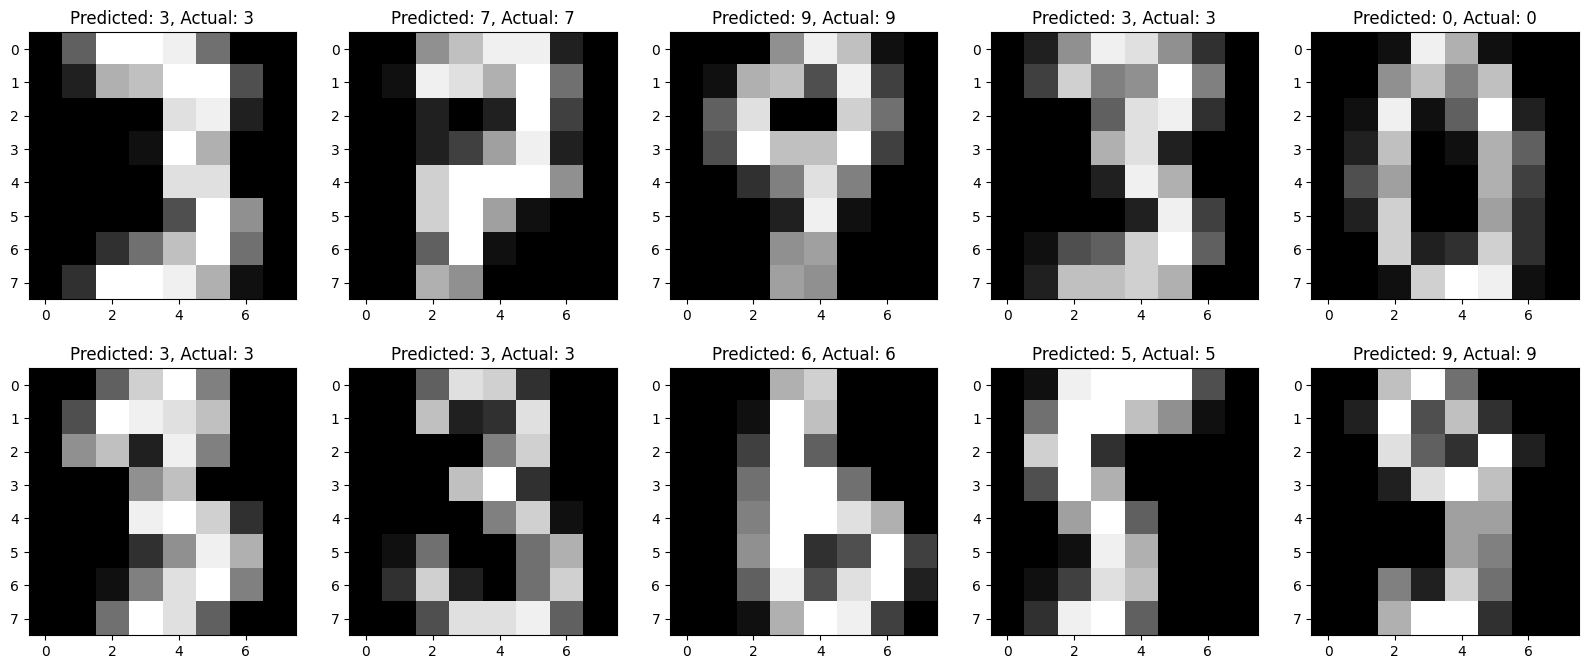

In [17]:
import matplotlib.pyplot as plt
import numpy as np

n_images = 10

random_indexes = np.random.choice(range(len(y)), n_images)
images = X[random_indexes]
true_labels = y[random_indexes]
predicted_labels = yhat[random_indexes]

plt.subplots(2, 5, figsize=(20, 8))
for i in range(n_images):
    plt.subplot(2, 5, i+1)
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.imshow(images[i].reshape(8,8), cmap='gray')